# Plotting 1D MRS data using Suspect's `plot_1D_signals` module

Suspect's `plot_1D_signals` module provides a set of functions for plotting MRS data. It is built on matplotlib's library of plotting functions, and automatically applies formatting and styling parameters that are useful for visualizing 1D MRS signals. This notebook provides an overview and examples of the basic functionality provided by the module, including: 

1. Importing data
2. Plotting 1D MR spectra
  * Modifying default parameters
  * Multi-line plots
  * Creating subplots  
2. Plotting raw MR spectra
3. Using `plot_1D_signals` for batch processing


## Importing data

Start by importing the modules we will need:

In [1]:
import suspect
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

To simplify the syntax for future calls to the funcions in the `plot_1D_signals` module, import them to the namespace:

In [2]:
import suspect.viz.plot_1D_signals as plot_sigs

Load some data. For this example, we will use a file in the rda format that contains a single 1D complex FID signal. 

In [3]:
data = suspect.io.load_rda('SVS_30.rda')

`data` is an instance of the `MRSData` class, which is subclass of a numpy `array` that adds MRS-specific properties and methods.

The axes we need for plotting the signal are attributes of the `data` object. These are:

`data.time_axis` (seconds)

`data.frequency_axis`: (Hz)

`data.frequency_axis_ppm`: (ppm)

For some datasets, it might be useful to collapse any singleton dimensions:

In [4]:
fid = np.squeeze(data) # Time-domain signal
spectrum = np.squeeze(data.spectrum()) # Frequency-domain signal

`fid` and `spectrum` are complex `numpy` arrays with 1024 data points.

## Plotting 1D MR Spectra

To start, plot the magnitude of the frequency-domain signal (spectrum) using the `plot` function in the `plot_1D_signals` module, with the default plotting parameters for a spectral representation of the data.

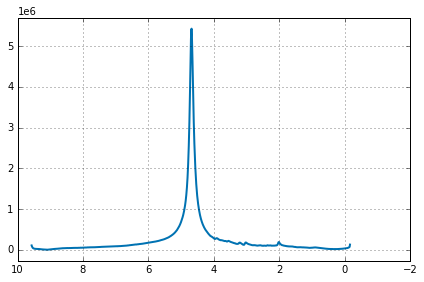

In [5]:
# First, get the x-axis data, which in this case will be ppms
ppm_axis = data.frequency_axis_ppm()

fig_handle, current_axis, line_handles = plot_sigs.plot(ppm_axis,np.abs(spectrum), plot_type='spectrum')

The `plot` function generates a new figure, adds an axis to it, and returns the handles of the figure, current axis, and any lines that were added to the axis.

### Modifying the figure parameters
The figure we generated utilized the default styling parameters for MR spectra. These can be accessed and changed in a variety of ways.

The default parameters are easy to find and change in the code. They can be accessed here:

In [6]:
plot_sigs.get_default_plot_params();

Some additional default parameters have been defined for frequency and time-somain representations of the data. These can be accessed by specifying the `plot_type` when calling `get_default_plot_parameters`. The options are:

`spectrum`: Frequency domain data, best for <= 5 signals plotted on the same axis

`spectra`: Frequency domain data, best for > 5 signals plotted on the same axis

`fid`: Time domain data, best for <= 5 signals plotted on the same axis

`fids`: Time domain data, best for > 5 signals plotted on the same axis


In [7]:
# Get the default parameters for spectrum plots
spectrum_defaults = plot_sigs.get_default_plot_params(plot_type='spectrum');

To change any of these parameters, pass in a dictionary of `key:value` pairs defining the parameters you want to change. The default values will be used unless otherwise specified.

Let's change some things on the original plot to make it look a bit nicer.

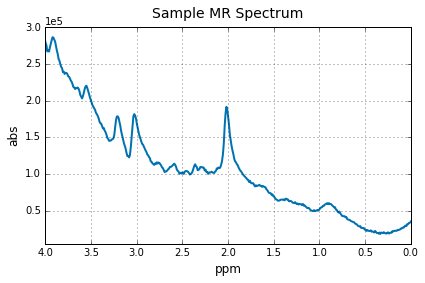

In [8]:
# Create a dictionary of key:value pairs containing the changes we want to make to the figure
new_params = {'xlim':[0,4],'title':'Sample MR Spectrum','xlabel':'ppm','ylabel':'abs'}

# Create a new plot, with updated figure parameters
fh, ax, lh = plot_sigs.plot(ppm_axis,np.abs(spectrum),plot_type='spectrum',
                            plot_params = new_params);

#### Autoscaling the y-axis

Note that even though we've changed the x-axis boundaries, the y-axis data has been re-scaled automatically to accommodate the data. This is not a built-in matplotlib capability. The function `autoscale_y` in the `plot_1D_signals` module does this.

This function can also be applied to axes that have been modified after the fact. For example, let's change the x-limits of the plot we just generated:

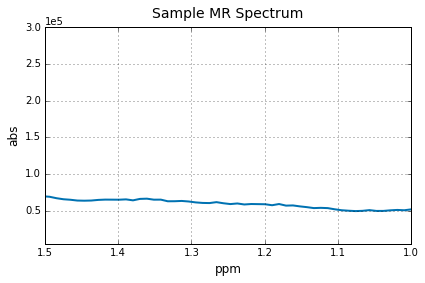

In [9]:
fh, ax, lh = plot_sigs.plot(ppm_axis,np.abs(spectrum),plot_type='spectrum',
                            plot_params = new_params);

# Change the x-limits of the axis generated by the plot function
ax.set_xlim([1.5,1.0]);

This looks kind of terrible. Use `plot_sigs.autoscale_y` to fix it:

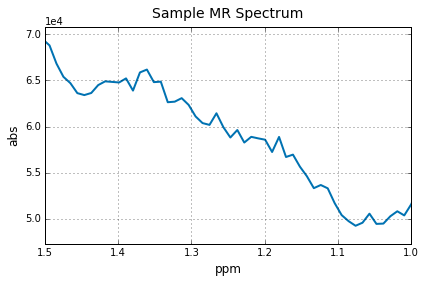

In [10]:
fh, ax, lh = plot_sigs.plot(ppm_axis,np.abs(spectrum),plot_type='spectrum',
                            plot_params = new_params);

# Change the x-limits of the axis generate by the plot function
ax.set_xlim([1.5,1.0]);

# Autoscale y-axis to better show the range of the data
plot_sigs.autoscale_y(ax);

Much better!

Note that autoscaling of the y-axis is done by default, but you can always turn it off by setting `plot_params['autoscale_y'] = False`.

### Multi-line plots

There are several ways that multiple lines can be added to the same plot. If the data to be plotted on the y-axis has more than one column (or row), each column (or row) of data will be plotted as a separate line. For example, say we want to plot the real and imaginary components of the spectrum from the previous example on the same axis:

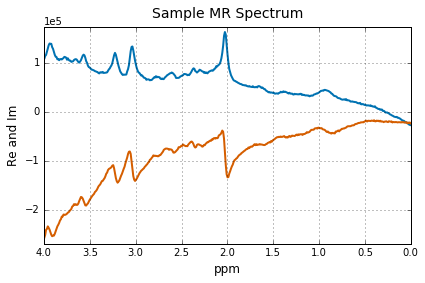

In [11]:
#Create an array of data with size [2 x 1024] by concatenating the Re and Im components of the signal
complex_signal = np.vstack((np.real(spectrum),np.imag(spectrum)))

new_params = {'xlim':[0,4],'title':'Sample MR Spectrum','xlabel':'ppm','ylabel':'Re and Im'}

# Add both lines to the same axis
fh, ax, lh = plot_sigs.plot(ppm_axis,complex_signal,plot_type='spectrum',
                            plot_params = new_params)

The color order of the lines that are sequentially added to the axis is defined in the default parameters, and can be changed.

Additional lines can be added to the plot after it has been generated as well.

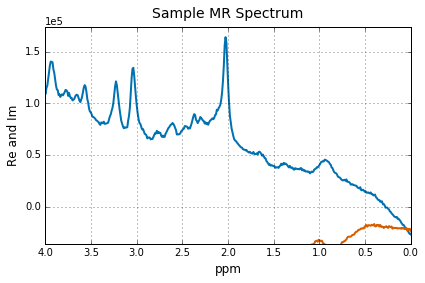

In [12]:
#Plot the first line
fh, ax, lh = plot_sigs.plot(ppm_axis,np.real(spectrum),plot_type='spectrum',
                            plot_params = new_params);

ax.hold('on') 

#Add the second line to the same axis, using the ax handle returned by the plot function
ax.plot(ppm_axis,np.imag(spectrum),linewidth=2);  

Oops, we didn't rescale the y-axis to accomodate the new line!

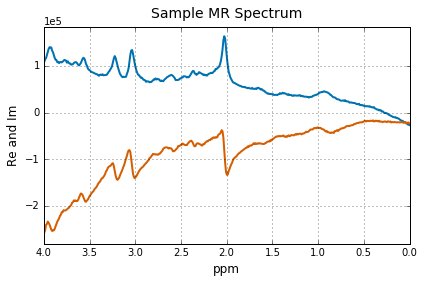

In [13]:
fh, ax, lh = plot_sigs.plot(ppm_axis,np.real(spectrum),plot_type='spectrum',
                            plot_params = new_params);

ax.hold('on') 
ax.plot(ppm_axis,np.imag(spectrum),linewidth=2); 

# Apply y-axis autoscaling to accomodate the new line
plot_sigs.autoscale_y(ax);

Looking good.

#### Adding a legend to the figure
One of the variables returned by the plot function contains the handles of all the lines plotted in the axis. This makes it very easy to add a legend to the figure after it has been generated.

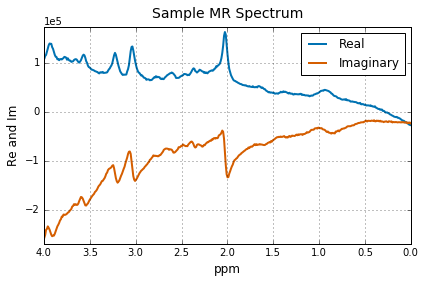

In [14]:
fig_handle, current_axis, line_handles = plot_sigs.plot(ppm_axis,complex_signal,
                                                        plot_type='spectrum',plot_params = new_params)

# Add the legend to the current axis
leg_handle = plt.legend(line_handles,['Real','Imaginary']);

### Creating subplots

The `plot_1D_signals` module has an optional input parameter `ax`, which specifies the axis to use for plotting the data.  If not specified, it will automatically create a new figure, add an axis to it, and plot the data in that axis.

The ability to specify the axis for plotting makes it easy to create a grid of subplots containing different views of the data with the same styling. 

Say you want to create a `[2 x 1]` set of subplots, with the real component of the data plotted in the first axis, and the imaginary component plotted in the second.  Here's how you might do it using the `plot_1D_signals` module:

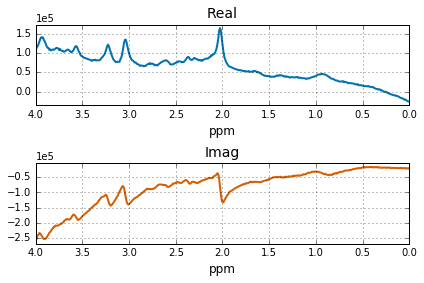

In [15]:
# Open up a new figure empty, with 2 rows and 1 column of subplots
new_fig,(ax1,ax2) = plt.subplots(2,1) 

# Specify some parameters to apply to the first axis
new_params = {'xlim':[0,4],'title':'Real','xlabel':'ppm','ylabel':''}

# Plot the Re signal on axis 1 by passing the handle, ax1, to the plot function
plot_sigs.plot(ppm_axis,np.real(spectrum),plot_type='spectrum',
               plot_params = new_params, ax=ax1);

# Plot the Im signal on axis 2

# Specify some parameters to apply to the second axis
new_params = {'xlim':[0,4],'title':'Imag','xlabel':'ppm','ylabel':'','line_color':'#d55e00'}

plot_sigs.plot(ppm_axis,np.imag(spectrum),plot_type='spectrum',
               plot_params = new_params, ax=ax2);

# Make the layout look a bit nicer
plt.tight_layout()

## Plotting raw MRS data

A good way to get a sense of the quality of the data is to plot the raw averages collected from each coil. This is the data before averaging and coil combination turn it into the kind of 1D signal we've been working with so far. It's a very interesting view of the data as it will allow us to easily detect any signal drift that may have occurred across the averages, and identify motion-induced artifacts, which are signal quality issues that can become obscured by the averaging + coil-combination process. However, for datasets with a large number of averages (e.g. 128) it can be a lot of data to (elegantly) plot on the same axis. The `plot_1D_signals` module provides functionality for easily generating and formatting these kinds of plots.

First, let's load some sample data. For this example, we will use a file in the TWIX format that contains the individual averages collected from a 32-channel head coil.

In [16]:
raw_data = suspect.io.twix.load_twix('twix_vb.dat')

`raw_data` is an instance of the `MRSData` class. The data it contains is structured as `[averages x coils x datapoints]` and its shape is `[128,32,2048]`.

#### Choosing a coil

For this example, we're going to plot all the averages (128) collected from a single coil. However, since the SNR of the signals detected by each coil varies greatly depending on where the coil is located relative to the signal source, some coils can have such low SNR that the informative features of the data won't even be visible.

The `plot_signal` module has a function, `suggest_channel`, that can...suggest the best coil to use for creating this view of the data.

In [17]:
# Find a good channel for plotting the raw data 
coil_idx, coil_max = plot_sigs.suggest_channel(raw_data);
print('Use coil ' + str(coil_idx) + '!') # Inex of the coil with the highest SNR

Use coil 0!


The function simply finds the coil with maximum maximum average value across all the averages. It's an easy (dumb) way of identifying the coil with the highest SNR. 

For this dataset, the first coil (index 0) is probably a good one to use for plotting. Let's get the slice of the raw data from this coil:

In [18]:
coil_data_spectra = raw_data.spectrum()[:,coil_idx,:]

Plot the data using default parameters, like we've done before, but this time use `plot_type = spectra` instead.

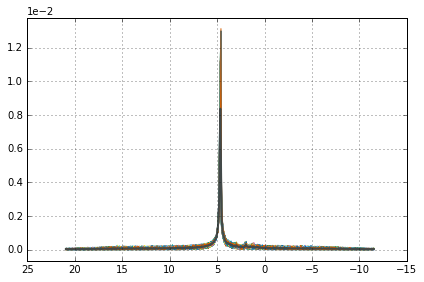

In [19]:
# Get the ppm axis for this dataset
ppm_axis = raw_data.frequency_axis_ppm()

fh, ax, lh = plot_sigs.plot(ppm_axis,np.abs(coil_data_spectra),plot_type='spectra');

Using `plot_type = spectra` instead of `spectrum` changes a couple of the default settings, including automatically overlaying the average of the signals (plotted in gray, although kind of hard to see in this view). Like all the other parameters, these can be changed as well.

Let's style this plot a bit, and zoom into the region around the residual H2O peak, which is a good place to look for evidence of signal drift and motion artifacts.

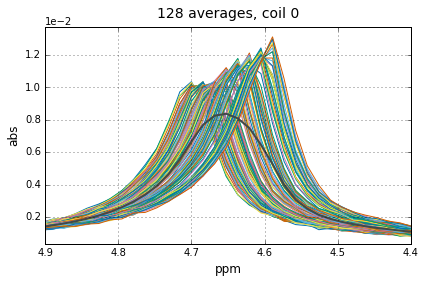

In [20]:
new_params = {'xlim':[raw_data.ppm0-0.3, raw_data.ppm0+0.2], 'xlabel':'ppm', 
              'title':'128 averages, coil ' + str(coil_idx),'ylabel':'abs'}

plot_sigs.plot(ppm_axis,np.abs(coil_data_spectra),plot_type='spectra',
               plot_params = new_params);

With this view of the data, we can see that there is definitely some signal drift happening across the averages. It looks like the residual H2O peak starts out at 4.7 ppm and drifts about 0.11 ppm over the course of 128 averages. 

Let's see what this data looks like in the time-domain:


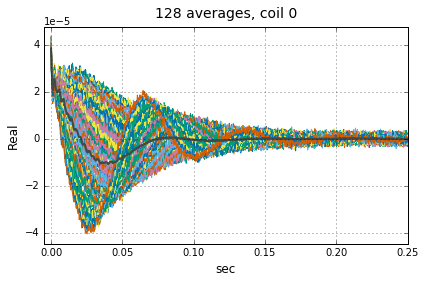

In [21]:
# Get the slice of the time-domain data from the selected coil
coil_data_fid = raw_data[:,coil_idx,:] 

# Define some new parameters that are more appropriate for time-domain data
new_params = {'xlim':[-0.005,0.25], 'xlabel':'sec', 'title':'128 averages, coil ' + str(coil_idx),
              'ylabel':'Real'}

# Call the plotting function using plot_type = 'fids'
plot_sigs.plot(raw_data.time_axis(),np.real(coil_data_fid),plot_type='fids',plot_params = new_params);


### Using a colormap to track the averages

When multiple lines are added to the same axis, they are assigned a color based on the order in which they are added. If we want to trace the drift in the averages over time, we can instead use a colormap gradient to assign colors to the lines as they are added to the axis. You can select this option by setting the parameter `use_colormap = True`.

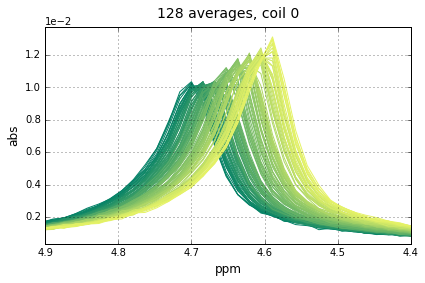

In [22]:
new_params = {'use_colormap':True,'overlay_average':False,'xlim':[raw_data.ppm0-0.3, raw_data.ppm0+0.2], 
              'xlabel':'ppm', 'title':'128 averages, coil ' + str(coil_idx),'ylabel':'abs'}

plot_sigs.plot(ppm_axis,np.abs(coil_data_spectra),plot_type='spectra',plot_params = new_params);

And in the time-domain:

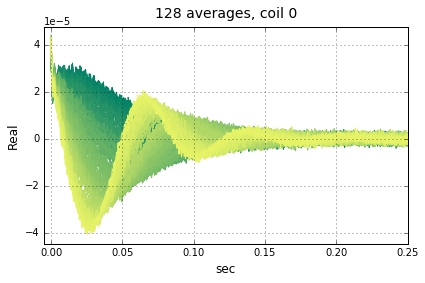

In [23]:
new_params = {'use_colormap':True,'overlay_average':False,'xlim':[-0.005,0.25], 'xlabel':'sec',
              'title':'128 averages, coil ' + str(coil_idx),'ylabel':'Real','use_colormap':True}

# Call the plotting function using plot_type = 'fids'
plot_sigs.plot(raw_data.time_axis(),np.real(coil_data_fid),plot_type='fids',plot_params = new_params);

This is Matplotlib's colormap `summer`, and it is the default colormap but any of the built-in colormaps can be used. For instance `viridis` looks pretty cool.

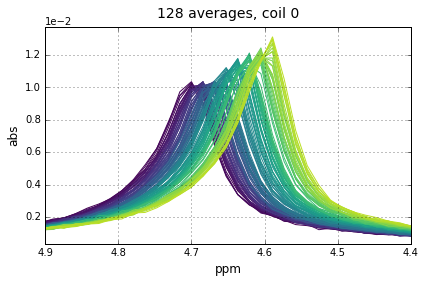

In [24]:
new_params = {'use_colormap':True,'colormap':'viridis','overlay_average':False,
              'xlim':[raw_data.ppm0-0.3, raw_data.ppm0+0.2], 'xlabel':'ppm', 'title':'128 averages, coil ' + str(coil_idx),'ylabel':'abs'}

plot_sigs.plot(ppm_axis,np.abs(coil_data_spectra),plot_type='spectra',plot_params = new_params);

Look here for all the built-in colormaps:
http://matplotlib.org/examples/color/colormaps_reference.html

## Using `plot_1D_signals` for batch processing

The `plot_1D_signals` module has some additional functionality that makes it easy to do batch processing. Say you have several files you want to process, and you'd like to generate plots of the raw data and at various stages of the processing pipeline. Instead of generating a new figure window every time, there are a few options in the `plot_1D_signals` module that allow you to completely suppress rendering of the figure, automatically save it wherever you want, and automatically close it.

These options work best when you use one of matplotlib's non-inline backends. For this example, we'll use a `qt` backend. 

In [25]:
%matplotlib qt

Using the `qt` backend ainstead of `inline` will plot new figures in a separate window, instead of inside the `ipython` console.

Here is an example of how you might use the `plot_1D_signals` module to generate a new plot, suppress its rendering, save it, and automatically close it.


In [ ]:
# Define some new parameters
new_params = {'suppress_fig':True,'autoclose':True,'save_fig':True,'output_fig_path':'test_fig.png',
             'use_colormap':True,'colormap':'viridis','xlim':[0,4], 'xlabel':'ppm', 'title':'128 averages, coil ' + str(coil_idx),'ylabel':'abs'}

plot_sigs.plot(ppm_axis,np.abs(coil_data_spectra),plot_type='spectra',
               plot_params = new_params);

There should now be a `png` image file containing the plot we just created, wherever `output_fig_path` said to put it. Note that `output_fig_path` should contain the full path to the location where you'd like the file saved, as well as the file name.